In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
##modeling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


In [7]:
df=pd.read_csv('StudentsPerformance.csv')
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [8]:
x=df.drop(columns='math score',axis=1)
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [9]:
y=df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [11]:
for col in x.columns:
    if col not in ['reading score','writing score']:
        print("Category in {0} are {1}".format(col,df[col].unique()))

Category in gender are ['female' 'male']
Category in race/ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E']
Category in parental level of education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Category in lunch are ['standard' 'free/reduced']
Category in test preparation course are ['none' 'completed']


In [13]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include='object').columns
num_features


Index(['reading score', 'writing score'], dtype='object')

In [14]:
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [17]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_transformer=StandardScaler()
ohe_transformer=OneHotEncoder()
col_transformer=ColumnTransformer(
    [
        ("OneHotEncoder",ohe_transformer,cat_features),
        ("StandardScaler",num_transformer,num_features)
    ])
            

In [18]:
x=col_transformer.fit_transform(x)
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [19]:
x.shape

(1000, 19)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f'X_train shape: {x_train.shape}\ny_train_shape:{y_train.shape}')
print(f'X_train shape: {x_test.shape}\ny_train_shape:{y_test.shape}')

X_train shape: (800, 19)
y_train_shape:(800,)
X_train shape: (200, 19)
y_train_shape:(200,)


7.Create a evalution function that calculates the values of all metrics


In [22]:
def evaluate(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predicted)
    return mae,rmse,r2
    

8.Define Model

In [23]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K_Neighbors_Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}

In [26]:
mae_list=[]
rmse_list=[]
r2_list=[]

for key in models.keys():
    current_model=models[key]
    current_model.fit(x_train,y_train)
    
    ## Make prediction
    y_train_pred=current_model.predict(x_train)
    y_test_pred=current_model.predict(x_test)
    
    ## Evaluate model on train and test sets
    train_mae,train_rmse,train_r2=evaluate(y_train,y_train_pred)
    test_mae,test_rmse,test_r2=evaluate(y_test,y_test_pred)
    
    print(f'{key} Performance for training set:')
    print(f'-Root Mean Squared Error:{round(train_rmse,2)}')
    print(f'- Mean Absolute Error:{round(train_mae,2)}')
    print(f'- R2 Score:{round(train_r2,2)}')
    print('------------------------------------------------------------')
    print(f'{key} Performance for test set:')
    print(f'-Root Mean Squared Error:{round(test_rmse,2)}')
    print(f'- Mean Absolute Error:{round(test_mae,2)}') 
    print(f'- R2 Score:{round(test_r2,2)}') 
          
          
    mae_list.append(round(test_mae,2));rmse_list.append(round(test_rmse,2));r2_list.append(round(test_r2,2))
    print('='*55)      
              
          
    
    

Linear Regression Performance for training set:
-Root Mean Squared Error:5.32
- Mean Absolute Error:4.27
- R2 Score:0.87
------------------------------------------------------------
Linear Regression Performance for test set:
-Root Mean Squared Error:5.39
- Mean Absolute Error:4.21
- R2 Score:0.88
Lasso Performance for training set:
-Root Mean Squared Error:6.59
- Mean Absolute Error:5.21
- R2 Score:0.81
------------------------------------------------------------
Lasso Performance for test set:
-Root Mean Squared Error:6.52
- Mean Absolute Error:5.16
- R2 Score:0.83
Ridge Performance for training set:
-Root Mean Squared Error:5.32
- Mean Absolute Error:4.26
- R2 Score:0.87
------------------------------------------------------------
Ridge Performance for test set:
-Root Mean Squared Error:5.39
- Mean Absolute Error:4.21
- R2 Score:0.88
K_Neighbors_Regressor Performance for training set:
-Root Mean Squared Error:5.71
- Mean Absolute Error:4.52
- R2 Score:0.86
--------------------------

10.show Results

In [29]:
pd.DataFrame(list(zip(list(models.keys()),r2_list)),columns=["Model Name","R2_Score"]).sort_values(
by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.88
2,Ridge,0.88
5,Random Forest Regressor,0.85
7,AdaBoostRegressor,0.84
1,Lasso,0.83
6,XGBRegressor,0.83
3,K_Neighbors_Regressor,0.78
4,Decision Tree Regressor,0.75


In [34]:
pd.DataFrame(list(zip(list(models.keys()),rmse_list)),columns=["Model Name","Root Mean Sqaured Error"]).sort_values(
by=["Root Mean Sqaured Error"],ascending=False)

,Model Name,Root Mean Sqaured Error
4,Decision Tree Regressor,7.83
3,K_Neighbors_Regressor,7.25
1,Lasso,6.52
6,XGBRegressor,6.47
7,AdaBoostRegressor,6.16
5,Random Forest Regressor,5.96
0,Linear Regression,5.39
2,Ridge,5.39


In [35]:
pd.DataFrame(list(zip(list(models.keys()),mae_list)),columns=["Model Name","Mean Absolute Error"]).sort_values(
by=["Mean Absolute Error"],ascending=False)

,Model Name,Mean Absolute Error
4,Decision Tree Regressor,6.26
3,K_Neighbors_Regressor,5.62
1,Lasso,5.16
6,XGBRegressor,5.06
7,AdaBoostRegressor,4.80
5,Random Forest Regressor,4.67
0,Linear Regression,4.21
2,Ridge,4.21


In [38]:
linear_reg=LinearRegression(fit_intercept=True)
linear_reg.fit(x_train,y_train)
y_test_pred=linear_reg.predict(x_test)
r2_score_test=r2_score(y_test,y_test_pred)
print(f'Accuracy of Linear Regression is : {round(round(r2_score_test,2)*100)}%')

Accuracy of Linear Regression is : 88%


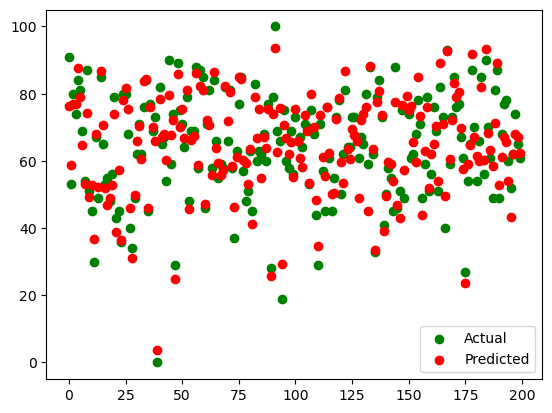

In [40]:
plt.scatter(np.arange(len(y_test)),y_test,color='green',label="Actual")
plt.scatter(np.arange(len(y_test_pred)),y_test_pred,color='red',label="Predicted")
plt.legend()
plt.show()

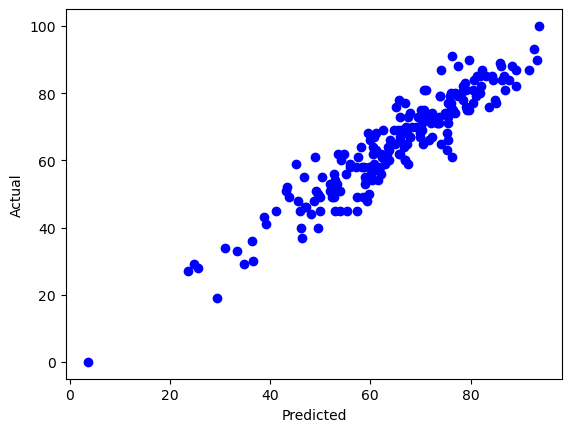

In [41]:
plt.scatter(y_test_pred,y_test,color='blue')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


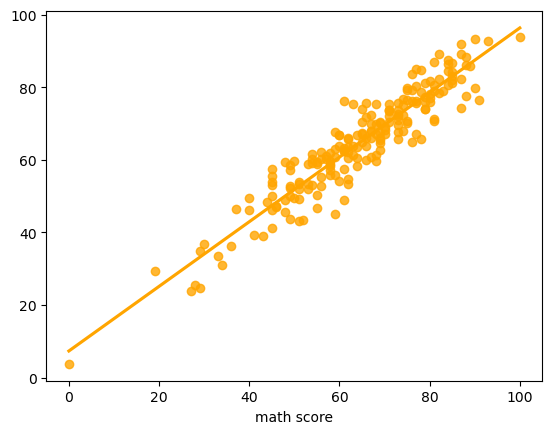

In [42]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color='orange');

In [43]:
pred_df=pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred,"Difference":(y_test-y_test_pred)})
pred_df

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
